# Final Project Data Mining 
## Ben Kolber 
## Jonathan Bofman

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from tqdm.notebook import tqdm

In [18]:
# Get rid of outliers from a list based on target variable 
def cut_by_q(df, cols, q_top, q_bottom):
    for col in cols:
        df = df[df[col] < df[col].quantile(q_top)]
        df = df[df[col] > df[col].quantile(q_bottom)]
    return df


In [22]:
df = pd.read_csv("/Users/jonathanbofman/Desktop/IPUMS_2.csv")

Our dataset consists of 13 different variables with 58MM rows

In [23]:
df.shape

(34530496, 15)

In [24]:
df.head()

YEAR  PERNUM  PERWT  AGE  MARST  MARRNO  SCHOOL  EDUC  EDUCD  SCHLTYPE  \
0  2009       1      3   51      3       1       1     6     63         1   
1  2009       1     22   64      1       1       1     7     71         1   
2  2009       2     21   68      1       2       1     5     50         1   
3  2009       1     30   61      4       1       1     6     63         1   
4  2009       2     32   38      6       0       1     6     63         1   

   DEGFIELD   INCTOT    FTOTINC  INCWAGE  INCWELFR  
0         0   3800.0  9999999.0      0.0         0  
1         0  36800.0    91400.0  27100.0         0  
2         0  54600.0    91400.0  22100.0         0  
3         0   6000.0    20000.0   6000.0         0  
4         0  14000.0    20000.0  14000.0         0

We will remove all NA values and average them out per year in order to check wether any of the variables imported have missing data. The combination of multiple datasets means that in some cases there will be no overlap in the years the data was recorded. 

In [25]:
tmp_df = df.copy(deep = True)
tmp_df = tmp_df.fillna(0)

In [26]:
tmp_df.groupby(['YEAR']).mean()

PERNUM       PERWT        AGE     MARST    MARRNO    SCHOOL      EDUC  \
YEAR                                                                            
2009  2.118687  101.297957  39.532027  3.556202  0.775953  1.216186  5.816354   
2010  2.131040  101.038801  39.694774  3.584576  0.769527  1.217232  5.837517   
2011  2.084956  100.125391  40.256494  3.637987  0.762985  1.219314  5.844081   
2012  2.087251  100.838746  40.453983  3.624866  0.765139  1.217758  5.902341   
2013  2.095913  100.909520  40.458839  3.620236  0.763194  1.216602  5.962201   
2014  2.090596  101.786388  40.823441  3.617534  0.765506  1.212702  6.004641   
2015  2.084272  102.134830  41.083592  3.613372  0.767322  1.209073  6.050968   
2016  2.083550  102.369348  41.311650  3.609990  0.767226  1.206577  6.101782   
2017  2.083905  102.105045  41.287229  3.610850  0.765366  1.206159  6.147683   
2018  2.076189  101.777405  41.634480  3.603811  0.769160  1.202833  6.198827   
2019  2.069047  101.322474  42.224377  3.583418  0.777282  1.198688  6.266964   

          EDUCD  SCHLTYPE   DEGFIELD        INCTOT        FTOTINC  \
YEAR                                                                
2009  60.598742  1.260404   8.789412  1.894783e+06  359602.852945   
2010  60.806511  1.259886   8.928531  1.879017e+06  344959.388561   
2011  60.873469  1.264290   8.649697  1.797936e+06  601839.565812   
2012  61.454812  1.262107   8.991452  1.791959e+06  573992.033540   
2013  62.058615  1.260298   9.385428  1.787488e+06  562185.229818   
2014  62.483142  1.255920   9.568145  1.759399e+06  553831.361611   
2015  62.943855  1.252143   9.828425  1.732321e+06  566974.626095   
2016  63.448281  1.249441  10.154612  1.718780e+06  566917.894248   
2017  63.907099  1.248835  10.441598  1.721082e+06  573529.155693   
2018  64.424399  1.245454  10.687365  1.691919e+06  583119.509409   
2019  65.106519  1.241113  11.062220  1.655309e+06  580076.788834   

            INCWAGE      INCWELFR  
YEAR                               
2009  220840.170789  18702.439429  
2010  218408.827175  18558.476116  
2011  209262.265810  17754.257163  
2012  209236.500520  17681.587382  
2013  209880.120189  17617.745099  
2014  207274.782954  17325.442022  
2015  205342.380138  17036.772676  
2016  204626.372750  16889.571467  
2017  205444.359731  16901.151386  
2018  203267.492930  16592.969071  
2019  200328.668268  16199.939077

We notice that between 2000 to 2009 there is no data recorded for the following categories:
1. MARRNO - number of times married 
2. DEGFIELD - Field of study 
3. YRMARR - year married 

Thus, we decide to work with only data from 2009 to 2019, and remove the DISABWRK (disability) feature, as it contains no data in these years. 

In [28]:
df = df[df.YEAR > 2008]

In [29]:
df.groupby(['YEAR']).mean()

PERNUM       PERWT        AGE     MARST    MARRNO    SCHOOL      EDUC  \
YEAR                                                                            
2009  2.118687  101.297957  39.532027  3.556202  0.775953  1.216186  5.816354   
2010  2.131040  101.038801  39.694774  3.584576  0.769527  1.217232  5.837517   
2011  2.084956  100.125391  40.256494  3.637987  0.762985  1.219314  5.844081   
2012  2.087251  100.838746  40.453983  3.624866  0.765139  1.217758  5.902341   
2013  2.095913  100.909520  40.458839  3.620236  0.763194  1.216602  5.962201   
2014  2.090596  101.786388  40.823441  3.617534  0.765506  1.212702  6.004641   
2015  2.084272  102.134830  41.083592  3.613372  0.767322  1.209073  6.050968   
2016  2.083550  102.369348  41.311650  3.609990  0.767226  1.206577  6.101782   
2017  2.083905  102.105045  41.287229  3.610850  0.765366  1.206159  6.147683   
2018  2.076189  101.777405  41.634480  3.603811  0.769160  1.202833  6.198827   
2019  2.069047  101.322474  42.224377  3.583418  0.777282  1.198688  6.266964   

          EDUCD  SCHLTYPE   DEGFIELD        INCTOT        FTOTINC  \
YEAR                                                                
2009  60.598742  1.260404   8.789412  1.894783e+06  359602.852945   
2010  60.806511  1.259886   8.928531  1.879017e+06  344959.388561   
2011  60.873469  1.264290   8.649697  1.797936e+06  601839.565812   
2012  61.454812  1.262107   8.991452  1.791959e+06  573992.033540   
2013  62.058615  1.260298   9.385428  1.787488e+06  562185.229818   
2014  62.483142  1.255920   9.568145  1.759399e+06  553831.361611   
2015  62.943855  1.252143   9.828425  1.732321e+06  566974.626095   
2016  63.448281  1.249441  10.154612  1.718780e+06  566917.894248   
2017  63.907099  1.248835  10.441598  1.721082e+06  573529.155693   
2018  64.424399  1.245454  10.687365  1.691919e+06  583119.509409   
2019  65.106519  1.241113  11.062220  1.655309e+06  580076.788834   

            INCWAGE      INCWELFR  
YEAR                               
2009  220840.170789  18702.439429  
2010  218408.827175  18558.476116  
2011  209262.265810  17754.257163  
2012  209236.500520  17681.587382  
2013  209880.120189  17617.745099  
2014  207274.782954  17325.442022  
2015  205342.380138  17036.772676  
2016  204626.372750  16889.571467  
2017  205444.359731  16901.151386  
2018  203267.492930  16592.969071  
2019  200328.668268  16199.939077

We are now left with 34 million rows, from which we will take a sample. 

In [30]:
df.shape

(34530496, 15)

In [31]:
sample_df = df.sample(frac=0.1, replace=False, random_state=42)
sample_df.shape

(3453050, 15)

# Let's see how much missing data we have

In [32]:
sample_df.replace(0, np.nan, inplace=True)
sample_df.head()

YEAR  PERNUM  PERWT   AGE  MARST  MARRNO  SCHOOL  EDUC  EDUCD  \
9356534   2012       2     91  57.0      1     1.0     1.0  11.0    114   
30252905  2018       2    152  26.0      6     NaN     1.0  10.0    101   
905849    2009       1    112  34.0      1     1.0     1.0   8.0     81   
29129141  2018       1     86  88.0      5     2.0     1.0   6.0     63   
9553507   2012       5    158  31.0      6     NaN     1.0   6.0     63   

          SCHLTYPE  DEGFIELD    INCTOT   FTOTINC   INCWAGE  INCWELFR  
9356534        1.0      36.0  139000.0  262870.0  139000.0       NaN  
30252905       1.0      55.0   20500.0   74500.0   20500.0       NaN  
905849         1.0       NaN   51000.0   99900.0   51000.0       NaN  
29129141       1.0       NaN   14000.0   14000.0       NaN       NaN  
9553507        1.0       NaN    3000.0    2000.0       NaN       NaN

In [33]:
100-(sample_df.isnull().sum()/sample_df.shape[0]).round(4)*100


YEAR        100.00
PERNUM      100.00
PERWT       100.00
AGE          98.99
MARST       100.00
MARRNO       58.55
SCHOOL       96.86
EDUC         93.71
EDUCD       100.00
SCHLTYPE     96.86
DEGFIELD     22.50
INCTOT       89.40
FTOTINC      98.61
INCWAGE      66.74
INCWELFR     18.50
dtype: float64

In [34]:
sample_df.fillna(0, inplace=True)

Remove Other race (7), Two major races (8), and Three or more major races (9)

# LEVEL of EDU to INCOME 

In [38]:
df = pd.read_csv("/Users/jonathanbofman/Desktop/IPUMS_2.csv")
df.shape

(34530496, 15)

In [39]:
df['EDUC'].unique()

array([ 6,  7,  5,  3,  4,  1,  2, 10, 11,  8,  0])

In [40]:
df = df[df.INCTOT != 9999999.0]
df = df[df.INCWAGE != 9999999.0]

In [41]:
# Get rid of outliers from a list based on target variable 
def cut_by_q(df, cols, q_top, q_bottom):
    for col in cols:
        df = df[df[col] < df[col].quantile(q_top)]
        df = df[df[col] > df[col].quantile(q_bottom)]
    return df

df_full_q = cut_by_q(df, ['INCWAGE'], 0.999, 0)
df_full_q = cut_by_q(df_full_q, ['INCTOT'], 0.999, 0)

In [42]:
sample_group = df_full_q.groupby(['EDUC'])

In [43]:
income_dic = {}

for level in tqdm(range(1,12)):
    
    if level == 9:
        pass
    else:

        tot = sample_group.get_group(level).sum()
        income_dic[level] = [tot['INCWAGE'] / tot['PERWT'], tot['INCTOT'] / tot['PERWT']]

In [44]:
education_attainment = {
    1 : 'nursery',
    2 : 'grade 5 - 8',
    3 : 'grade 9',
    4 : 'grade 10',
    5 : 'grade 11',
    6 : 'grade 12',
    7 : '1yr college',
    8 : '2yr college',
    10: '4yr college',
    11: '5+yr college'
}

In [45]:
avg_wage   =  []
avg_income = []
for val in income_dic.values():
    avg_wage.append(val[0]) 
    avg_income.append(val[1])

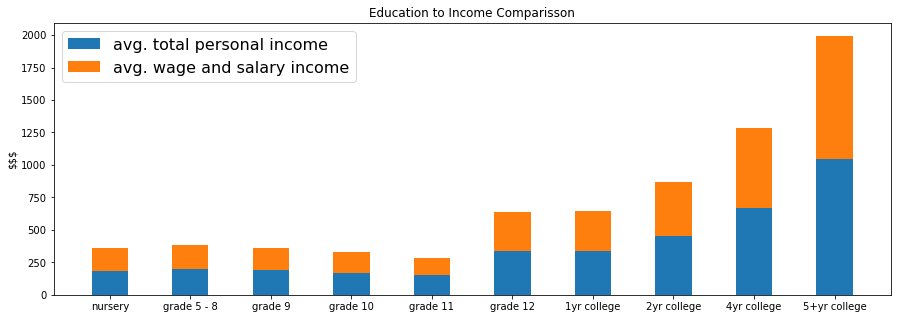

In [46]:
fig, ax = plt.subplots(figsize = (15,5))

ax.bar(education_attainment.values(), avg_income, width = 0.45 , label='avg. total personal income')
ax.bar(education_attainment.values(), avg_wage, width = 0.45 , label='avg. wage and salary income', bottom = avg_income)



ax.set_ylabel('$$$')
ax.set_title('Education to Income Comparisson')
ax.legend(prop={'size': 16})

# Degree to income comparisson

In [54]:
# Load and clean 
df = pd.read_csv("/Users/jonathanbofman/Desktop/IPUMS_2.csv")
df.shape

df = df[df.INCTOT != 9999999.0]
df = df[df.INCWAGE != 9999999.0]
df = df[df.DEGFIELD != 0]
df = df[df.DEGFIELD != 0.0]


# Get rid of outliers from a list based on target variable 
def cut_by_q(df, cols, q_top, q_bottom):
    for col in cols:
        df = df[df[col] < df[col].quantile(q_top)]
        df = df[df[col] > df[col].quantile(q_bottom)]
    return df

df_full_q = cut_by_q(df, ['INCWAGE'], 0.98, 0)
df_full_q = cut_by_q(df_full_q, ['INCTOT'], 0.98, 0)
df_full_q.shape

(5306629, 15)

In [55]:
# sample
sample_df = df_full_q.sample(frac=0.1, replace=False, random_state=42)
sample_df.shape

(530663, 15)

In [56]:
sample_group = sample_df.groupby(['DEGFIELD'])

In [57]:
sample_df['DEGFIELD'].unique()

array([50, 36, 53, 62, 23, 61, 33, 21, 24, 60, 52, 13, 55, 41, 56, 37, 48,
       40, 54, 19, 11, 59, 14, 25, 64, 49, 26, 29, 34, 32, 20, 15, 22, 51,
       35, 57, 38, 58])

In [60]:
income_dict = {}
wage_dict   = {}

for degree_type in tqdm(sample_df['DEGFIELD'].unique()):

    incomes = []
    wages   = []
    for index, row in sample_group.get_group(degree_type).iterrows():

        i = [row['INCTOT']]  * int(row['PERWT'])
        w = [row['INCWAGE']] * int(row['PERWT'])

        incomes.extend(i)
        wages.extend(w)
        
        
    income_dict[str(degree_type)] = incomes
    wage_dict[str(degree_type)]   = wages

In [61]:
field_dic = {
    11 : 'Agriculture',
    13 : 'Environment',
    14 : 'Architecture',
    15 : 'Civil Studies',
    19 : 'Communications',
    20 : 'Communications Tech',
    21 : 'IT',
    22 : 'Culinary',
    23 : 'Education',
    24 : 'Engineering',
    25 : 'Engineering Tech',
    26 : 'Languages',
    29 : 'Consumer Sciences',
    32 : 'Law',
    33 : 'Literature',
    34 : 'L.A / Humanities',
    35 : 'Library Science',
    36 : 'Biology',
    37 : 'Mathematics',
    38 : 'Military Techn',
    40 : 'General',
    41 : 'Physical Fitness',
    48 : 'Philosophy/ Religious',
    49 : 'Theology',
    50 : 'Physical Sciences',
    51 : 'Phsyics',
    52 : 'Psychology',
    53 : 'Criminal Justice',
    54 : 'Policy / PA',
    55 : 'Social Sciences',
    56 : 'Construction',
    57 : 'EE / ME',
    58 : 'Industrial Arts',
    59 : 'Transportation',
    60 : 'Fine Arts',
    61 : 'Medicine',
    62 : 'Business',
    64 : 'History'}

In [66]:
def adding_success_features(data, field_dic):
    outliers = data[data['INCTOT'] >= 200000].groupby('DEGFIELD').sum()
    total = data.groupby('DEGFIELD').sum()
    sum_outliers = outliers.PERWT.sum()
    
    precent_of_success = {}
    weighted_success = {}
    for k, v in field_dic.items():
        key = int(k)
        outliers_num = outliers.loc[key].PERWT if key in outliers.index else 0
        precent_of_success[key] = outliers_num/total.loc[key].PERWT
        weighted_success[key] = outliers_num/sum_outliers
        
    data["SUCCES_PERCENT"] = data['DEGFIELD'].map(precent_of_success)
    data["WEIGHT_SUCCES"] = data['DEGFIELD'].map(weighted_success)
    
    # fields of study with 5 most outliers w.r.t to the field
    print("fields of study with 5 most outliers w.r.t to the field:")
    top_5 = nlargest(5, precent_of_success, key = precent_of_success.get)
    i=1
    for val in top_5:
        print(i, field_dic[int(val)], round(precent_of_success[int(val)]*100, 2))
        i = i+1
        
    print("")
    # fields of study with lowest 5 outliers w.r.t the field
    print("fields of study with lowest 5 outliers w.r.t the field:")
    bottom_5 = nsmallest(5, precent_of_success, key = precent_of_success.get)
    i=1
    for val in bottom_5:
        print(i, field_dic[int(val)], round(precent_of_success[int(val)]*100, 2))
        i = i+1
    
    print("")
    print("------------------------------------------")
    print("")
    
    # fields of study with 5 most outliers w.r.t all degree fields
    print("fields of study with 5 most outliers w.r.t all degree fields:")
    top_5_all = nlargest(5, weighted_success, key = weighted_success.get)
    i=1
    for val in top_5_all:
        print(i, field_dic[int(val)], round(weighted_success[int(val)]*100, 2))
        i = i+1
        
    print("")
    # fields of study with lowest 5 outliers w.r.t all degree fields
    print("fields of study with lowest 5 outliers w.r.t all degree fields:")
    bottom_5_all = nsmallest(5, weighted_success, key = weighted_success.get)
    i=1
    for val in bottom_5_all:
        print(i, field_dic[int(val)], round(weighted_success[int(val)]*100, 2))
        i = i+1
    
    return data

In [67]:
from heapq import nlargest, nsmallest

avg_dic = {}
for k, v in income_dict.items():
    avg = sum(v)/len(v)
    avg_dic[field_dic[int(k)]] = avg

# Highest Total income avg Degree types 
print("Highest Total income avg Degree types:")
Highest = nlargest(15, avg_dic, key = avg_dic.get)
i = 1
for val in Highest:
    print(i,val, ":", avg_dic.get(val))
    i = i+1

Highest Total income avg Degree types:
1 Engineering : 87686.17455716018
2 Transportation : 81764.14502542577
3 IT : 79856.15159186911
4 Military Techn : 78051.45696539486
5 Engineering Tech : 76557.83502347844
6 Mathematics : 75470.54015795719
7 Physical Sciences : 75447.1976547973
8 Construction : 73790.19790955714
9 Business : 69333.71338958942
10 Biology : 68712.58404898943
11 Architecture : 68598.18341484753
12 Social Sciences : 67590.01520785007
13 History : 66125.23546619508
14 Phsyics : 65535.36826568266
15 EE / ME : 65089.74255171105


In [68]:
adding_success_features(sample_df, field_dic);

fields of study with 5 most outliers w.r.t to the field:
1 Biology 3.03
2 Physical Sciences 2.96
3 Engineering 2.91
4 Mathematics 2.75
5 Law 2.59

fields of study with lowest 5 outliers w.r.t the field:
1 Military Techn 0.0
2 Industrial Arts 0.0
3 Theology 0.35
4 Education 0.37
5 Consumer Sciences 0.48

------------------------------------------

fields of study with 5 most outliers w.r.t all degree fields:
1 Business 25.61
2 Engineering 14.1
3 Social Sciences 10.5
4 Biology 8.59
5 Physical Sciences 5.19

fields of study with lowest 5 outliers w.r.t all degree fields:
1 Military Techn 0.0
2 Industrial Arts 0.0
3 Phsyics 0.01
4 Library Science 0.01
5 Culinary 0.03


Text(0.5, 1.05, 'Total Income to Degree comparisson')

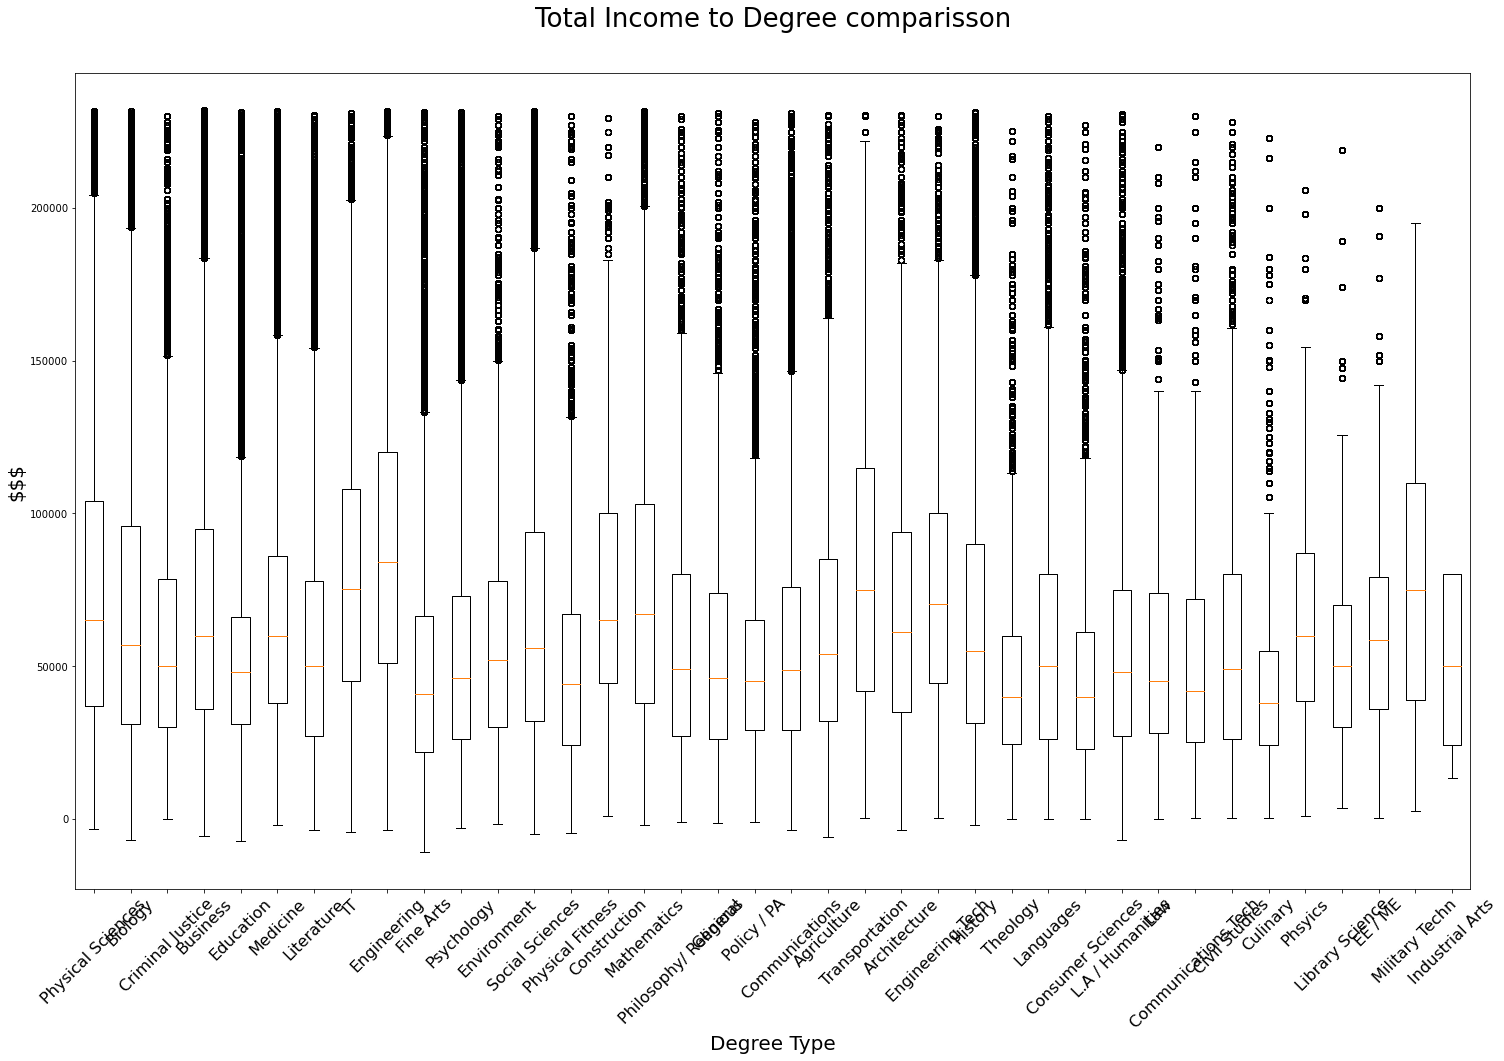

In [63]:
# or backwards compatable    
labels, data = income_dict.keys(), income_dict.values()
labels = [field_dic[int(z)] for z in labels]

fig, ax = plt.subplots(figsize = (25,15))

ax.boxplot(data)
#ax.set_xticks(range(1, len(labels) + 1), labels)


plt.xticks(range(1,len(labels) +1), labels, rotation=45, fontsize = 16);



ax.set_ylabel('$$$', fontsize = 20)
ax.set_xlabel('Degree Type', fontsize = 20)

ax.set_title('Total Income to Degree comparisson', y = 1.05, fontsize = 26)


Text(0.5, 1.05, 'Total Wage to Degree comparisson')

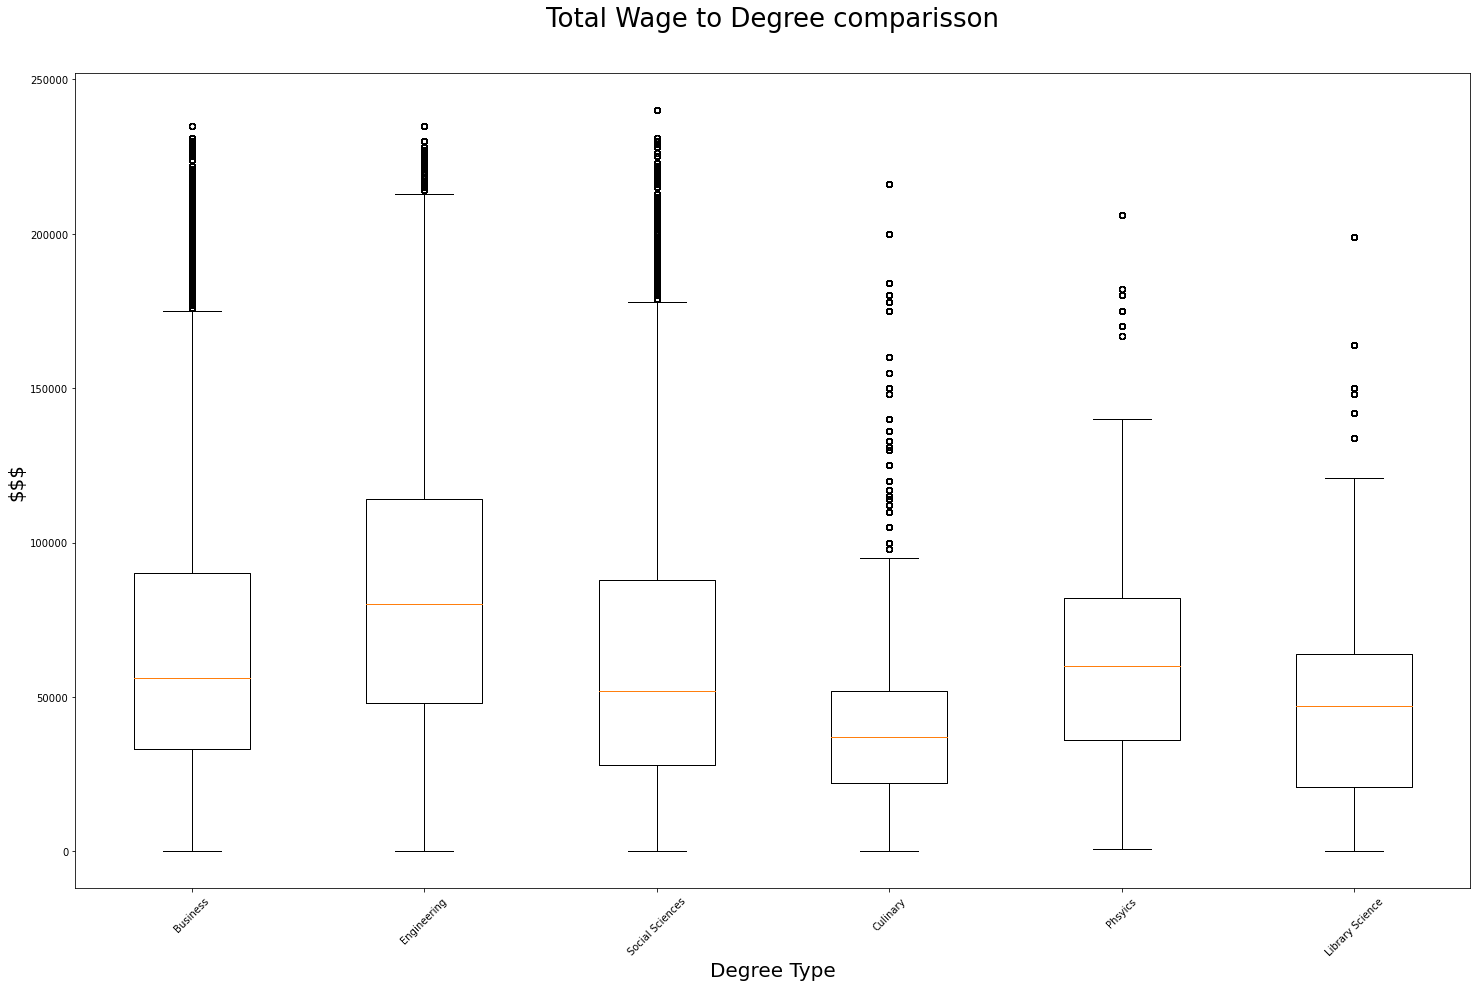

In [28]:
# or backwards compatable    
labels, data = wage_dict.keys(), wage_dict.values()
labels = [field_dic[int(z)] for z in labels]

fig, ax = plt.subplots(figsize = (25,15))

ax.boxplot(data)
#ax.set_xticks(range(1, len(labels) + 1), labels)


plt.xticks(range(1,len(labels) +1), labels, rotation=45, fontsize = 10);



ax.set_ylabel('$$$', fontsize = 20)
ax.set_xlabel('Degree Type', fontsize = 20)

ax.set_title('Total Wage to Degree comparisson', y = 1.05, fontsize = 26)

# Income level to number of times married 

In [113]:
# Load and clean 
df = pd.read_csv("/Users/jonathanbofman/Desktop/IPUMS_2.csv")
df.shape

df = df[df.INCTOT != 9999999.0]
df = df[df.INCWAGE != 9999999.0]
df = df[df.MARRNO != 0]


# Get rid of outliers from a list based on target variable 
def cut_by_q(df, cols, q_top, q_bottom):
    for col in cols:
        df = df[df[col] < df[col].quantile(q_top)]
        df = df[df[col] > df[col].quantile(q_bottom)]
    return df

df_full_q = cut_by_q(df, ['INCWAGE'], 0.98, 0)
df_full_q = cut_by_q(df_full_q, ['INCTOT'], 0.98, 0)
df_full_q.shape

(10902783, 15)

In [188]:
df_full_q.shape

(10902783, 15)

In [190]:
df_full_q = df_full_q.loc[df_full_q['AGE'] >= 18]
df_full_q.shape

(10900073, 15)

In [191]:
# remove all people under the age of 18 


In [ ]:
sample_df = df_full_q.sample(frac=0.1, replace=False, random_state=42)
sample_df.shape

In [74]:
def income_level(amount):
    if amount >= 200000.0:
        return "nine_nine_perc"
    elif amount >= 125000.0:
        return "ninety_perc"
    elif amount >= 75000:
        return "seventy_fifth_perc"
    elif amount >= 40000:
        return "fifty_perc"
    elif amount >= 20000:
        return "twenty_fifth_perc"
    elif amount >= 8000:
        return "ten_perc"
    else:
        return "poverty"
df["INCOME_LEVEL"] = df['INCTOT'].apply(income_level)

In [75]:
import collections
def class_to_num_married(data):
    dic = collections.defaultdict(dict)
    income_levels = data.groupby(["INCOME_LEVEL"])
    for level in income_levels.groups.keys():
        num_married = income_levels.get_group(level).groupby(["MARRNO"])
        for num in sorted(num_married.groups.keys()):
            dic[level][num]= num_married.get_group(num)["PERWT"].sum()
        
    return dic

In [194]:
class_to_num_dict = class_to_num_married(df)

In [195]:
# sort 
a_list = ('nine_nine_perc', 'ninety_perc', 'seventy_fifth_perc', 'fifty_perc', 'twenty_fifth_perc', 'ten_perc', 'poverty')
class_to_num_dict = dict([(k,class_to_num_dict[k]) for k in a_list])


In [196]:
single = []
double = []
triple = []

    
for key in class_to_num_dict.keys():

    single.append(class_to_num_dict[key][1])
    double.append(class_to_num_dict[key][2])
    triple.append(class_to_num_dict[key][3])
    
single = np.array(single) / 10
double = np.array(double) / 10
triple = np.array(triple) / 10

In [197]:
perc_dict = {}
for key in class_to_num_dict.keys():
    perc_dict[key] = {
        
        1: round(class_to_num_dict[key][1] / sum(class_to_num_dict[key].values()) * 100, 2),
        2: round(class_to_num_dict[key][2] / sum(class_to_num_dict[key].values()) * 100, 2),
        3: round(class_to_num_dict[key][3] / sum(class_to_num_dict[key].values()) * 100, 2)
        
    }

Text(0.92, 0.6, 'triple : 4.54%')

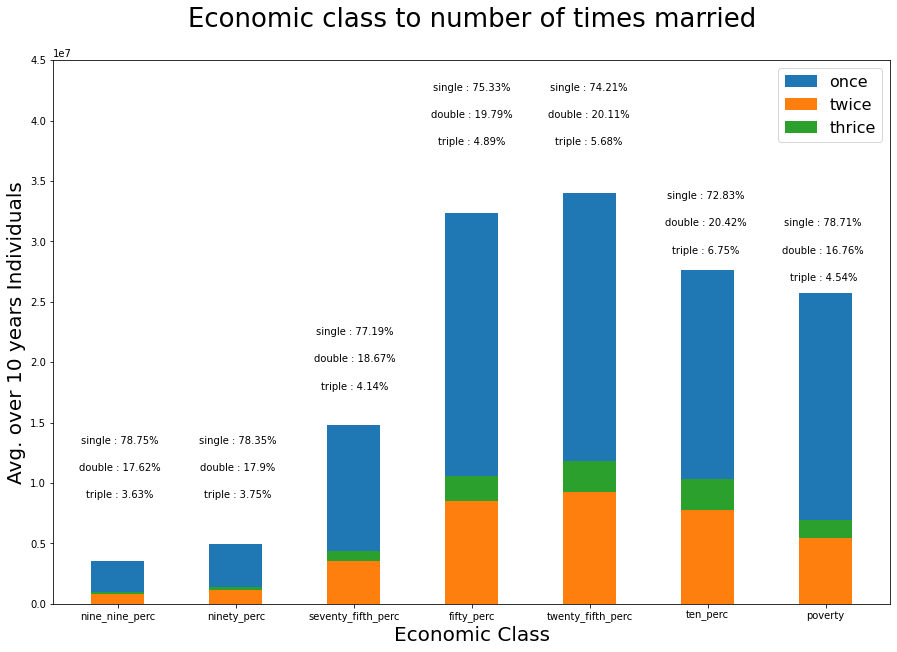

In [205]:
fig, ax = plt.subplots(figsize = (15,10))
labels = class_to_num_dict.keys()


ax.bar(labels, single, width = 0.45 , label='once')
ax.bar(labels, double, width = 0.45 , label='twice')
ax.bar(labels, triple, width = 0.45 , label='thrice', bottom = double)

ax.set_ylabel('Avg. over 10 years Individuals', fontsize = 20)
ax.set_xlabel('Economic Class', fontsize = 20)
ax.set_title('Economic class to number of times married', y=1.05, fontsize = 26)


ax.set_ylim([0,4.5 * 1e7])
ax.legend(prop={'size': 16})


ax.text(0.08, 0.3,  'single : {}%' .format(str(perc_dict[a_list[0]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.08, 0.25, 'double : {}%' .format(str(perc_dict[a_list[0]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.08, 0.2,  'triple : {}%' .format(str(perc_dict[a_list[0]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.22, 0.3,  'single : {}%' .format(str(perc_dict[a_list[1]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.22, 0.25, 'double : {}%' .format(str(perc_dict[a_list[1]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.22, 0.2,  'triple : {}%' .format(str(perc_dict[a_list[1]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.36, 0.5, 'single : {}%' .format(str(perc_dict[a_list[2]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.36, 0.45,  'double : {}%' .format(str(perc_dict[a_list[2]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.36, 0.4, 'triple : {}%' .format(str(perc_dict[a_list[2]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.50, 0.95, 'single : {}%' .format(str(perc_dict[a_list[3]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.50, 0.9,  'double : {}%' .format(str(perc_dict[a_list[3]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.50, 0.85, 'triple : {}%' .format(str(perc_dict[a_list[3]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.64, 0.95,  'single : {}%' .format(str(perc_dict[a_list[4]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.64, 0.9, 'double : {}%' .format(str(perc_dict[a_list[4]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.64, 0.85,  'triple : {}%' .format(str(perc_dict[a_list[4]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.78, 0.75, 'single : {}%' .format(str(perc_dict[a_list[5]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.78, 0.7,  'double : {}%' .format(str(perc_dict[a_list[5]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.78, 0.65, 'triple : {}%' .format(str(perc_dict[a_list[5]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.92, 0.7,  'single : {}%' .format(str(perc_dict[a_list[6]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.92, 0.65, 'double : {}%' .format(str(perc_dict[a_list[6]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.92, 0.6,  'triple : {}%' .format(str(perc_dict[a_list[6]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)







# Marriage Status vs. Economic Status

In [71]:
# Load and clean 
df = pd.read_csv("/Users/jonathanbofman/Desktop/IPUMS_2.csv")
df.shape

df = df[df.INCTOT  != 9999999.0]
df = df[df.INCWAGE != 9999999.0]
df = df[df.MARST   != 0]


# Get rid of outliers from a list based on target variable 
def cut_by_q(df, cols, q_top, q_bottom):
    for col in cols:
        df = df[df[col] < df[col].quantile(q_top)]
        df = df[df[col] > df[col].quantile(q_bottom)]
    return df

df.shape

#df_full_q = cut_by_q(df, ['INCWAGE'], 0.98, 0)
#df_full_q = cut_by_q(df_full_q, ['INCTOT'], 0.98, 0)
#df_full_q.shape

(28543292, 15)

In [72]:
sample_df = df.sample(frac=0.1, replace=False, random_state=42)
sample_df.shape

(2854329, 15)

In [76]:
sample_df["INCOME_LEVEL"] = sample_df['INCTOT'].apply(income_level)

In [77]:
sample_df.INCOME_LEVEL.unique()

array(['fifty_perc', 'twenty_fifth_perc', 'ten_perc', 'poverty',
       'seventy_fifth_perc', 'ninety_perc', 'nine_nine_perc'],
      dtype=object)

In [78]:
# Create a new DIVORCED column with 4 level: Divorced, Married, Never married, Widow
divorced = []
for index, row in sample_df.iterrows():
    # Check if is married
    if row['MARST'] == 2 or row['MARST'] == 1:
        # Check how many times was married
        if row['MARRNO'] > 1:
            # If more than once, he is divorced
            divorced.append("Divorced")
        else:
            # If married once he is Married
            divorced.append("Married")
    # Check if Divorced or Separated
    elif row['MARST'] == 4 or row['MARST'] == 3:
         divorced.append("Divorced")
    # Check if single
    elif row['MARST'] == 6:
        divorced.append("Never")
    else:
        # Last remaining option is widow
        divorced.append("Widow")
        
sample_df["DIVORCED"] = divorced

In [79]:
def divorce_to_income_level(data):
    dic = collections.defaultdict(dict)
    divorce_status = data.groupby(["DIVORCED"])
    for status in divorce_status.groups.keys():
        income_levels = divorce_status.get_group(status).groupby(["INCOME_LEVEL"])
        for level in income_levels.groups.keys():
            dic[status][level]= income_levels.get_group(level)["PERWT"].sum()
        
    return dic

In [80]:
sample_df.DIVORCED.unique()

array(['Married', 'Divorced', 'Never', 'Widow'], dtype=object)

In [81]:
marriage_dict = divorce_to_income_level(sample_df)

In [82]:
econ_keys = marriage_dict['Divorced'].keys()
marriage_val_dict = {}


for key in econ_keys:
    
    l = []
    for _, val in marriage_dict.items():
        
        l.append(val[key])
    
    marriage_val_dict[key] = l

labels = list(marriage_dict.keys())

In [83]:
sample_df.INCOME_LEVEL.unique()

array(['fifty_perc', 'twenty_fifth_perc', 'ten_perc', 'poverty',
       'seventy_fifth_perc', 'ninety_perc', 'nine_nine_perc'],
      dtype=object)

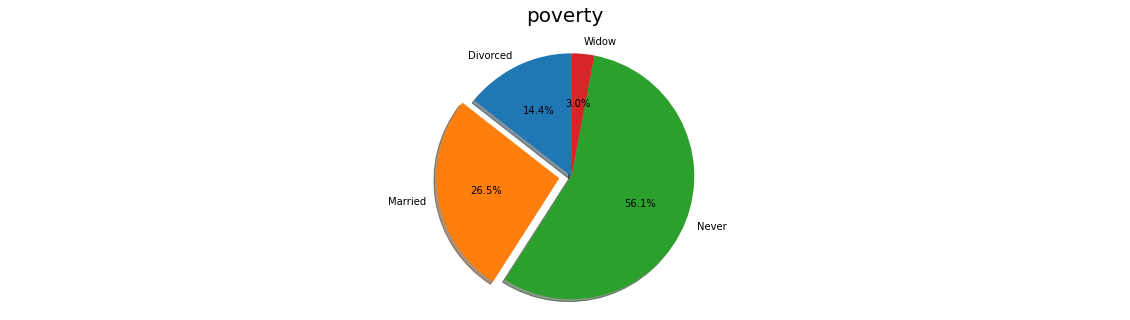

In [278]:
import matplotlib.pyplot as plt

pie_data = dict(sample_df.groupby(['INCOME_LEVEL']).get_group('poverty').groupby('DIVORCED').sum().PERWT)
labels = pie_data.keys()
sizes =  pie_data.values()
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax = plt.subplots(1, 1, figsize = (20,5))

ax.set_title('poverty', fontsize = 20, y=1.05)
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.








plt.show()

In [238]:
single

array([ 3520089.9,  4922772.7, 14781494.9, 32379835.6, 34025917.8,
       27667079.2, 25713616.9])

Text(0.92, 0.6, 'triple : 4.54%')

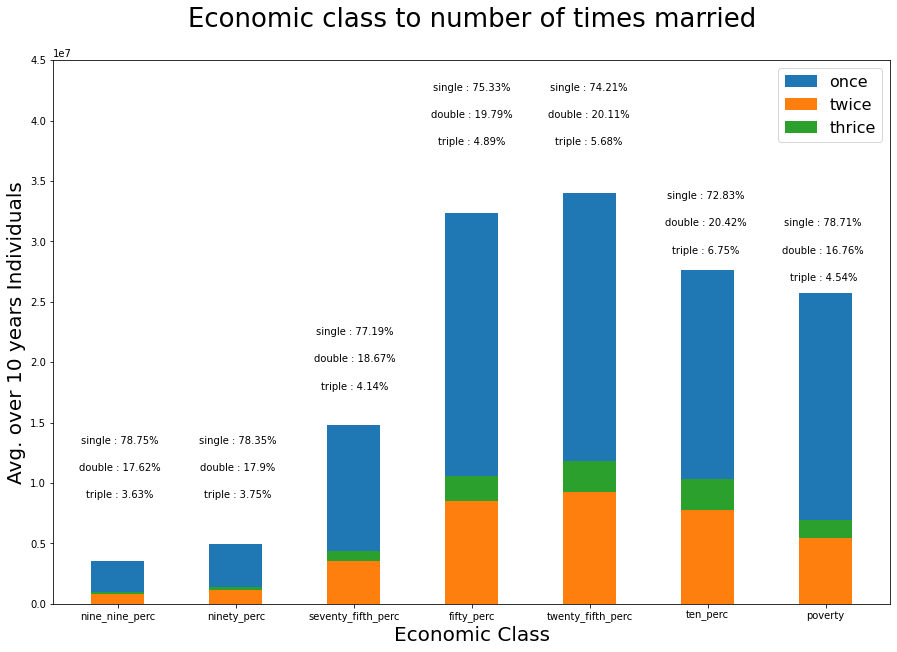

In [236]:
fig, ax = plt.subplots(figsize = (15,10))
labels = class_to_num_dict.keys()


ax.bar(labels, single, width = 0.45 , label='once')
ax.bar(labels, double, width = 0.45 , label='twice')
ax.bar(labels, triple, width = 0.45 , label='thrice', bottom = double)

ax.set_ylabel('Avg. over 10 years Individuals', fontsize = 20)
ax.set_xlabel('Economic Class', fontsize = 20)
ax.set_title('Economic class to number of times married', y=1.05, fontsize = 26)


ax.set_ylim([0,4.5 * 1e7])
ax.legend(prop={'size': 16})


ax.text(0.08, 0.3,  'single : {}%' .format(str(perc_dict[a_list[0]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.08, 0.25, 'double : {}%' .format(str(perc_dict[a_list[0]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.08, 0.2,  'triple : {}%' .format(str(perc_dict[a_list[0]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.22, 0.3,  'single : {}%' .format(str(perc_dict[a_list[1]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.22, 0.25, 'double : {}%' .format(str(perc_dict[a_list[1]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.22, 0.2,  'triple : {}%' .format(str(perc_dict[a_list[1]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.36, 0.5, 'single : {}%' .format(str(perc_dict[a_list[2]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.36, 0.45,  'double : {}%' .format(str(perc_dict[a_list[2]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.36, 0.4, 'triple : {}%' .format(str(perc_dict[a_list[2]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.50, 0.95, 'single : {}%' .format(str(perc_dict[a_list[3]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.50, 0.9,  'double : {}%' .format(str(perc_dict[a_list[3]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.50, 0.85, 'triple : {}%' .format(str(perc_dict[a_list[3]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.64, 0.95,  'single : {}%' .format(str(perc_dict[a_list[4]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.64, 0.9, 'double : {}%' .format(str(perc_dict[a_list[4]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.64, 0.85,  'triple : {}%' .format(str(perc_dict[a_list[4]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.78, 0.75, 'single : {}%' .format(str(perc_dict[a_list[5]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.78, 0.7,  'double : {}%' .format(str(perc_dict[a_list[5]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.78, 0.65, 'triple : {}%' .format(str(perc_dict[a_list[5]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.text(0.92, 0.7,  'single : {}%' .format(str(perc_dict[a_list[6]][1])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.92, 0.65, 'double : {}%' .format(str(perc_dict[a_list[6]][2])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.92, 0.6,  'triple : {}%' .format(str(perc_dict[a_list[6]][3])), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)



# For conclusion

In [105]:
# Load and clean 
df = pd.read_csv("/Users/jonathanbofman/Desktop/IPUMS_2.csv")
df.shape

df = df[df.INCTOT != 9999999.0]
df = df[df.INCWAGE != 9999999.0]
df = df[df.DEGFIELD != 0]
df = df[df.DEGFIELD != 0.0]


# Get rid of outliers from a list based on target variable 
def cut_by_q(df, cols, q_top, q_bottom):
    for col in cols:
        df = df[df[col] < df[col].quantile(q_top)]
        df = df[df[col] > df[col].quantile(q_bottom)]
    return df

df_full_q = cut_by_q(df, ['INCWAGE'], 0.98, 0)
df_full_q = cut_by_q(df_full_q, ['INCTOT'], 0.98, 0)
df_full_q.shape

(5306629, 15)

In [106]:
# sample
sample_df = df_full_q.sample(frac=0.1, replace=False, random_state=42)
sample_df.shape

(530663, 15)

In [108]:
# Create a new DIVORCED column with 4 level: Divorced, Married, Never married, Widow
divorced = []
for index, row in sample_df.iterrows():
    # Check if is married
    if row['MARST'] == 2 or row['MARST'] == 1:
        # Check how many times was married
        if row['MARRNO'] > 1:
            # If more than once, he is divorced
            divorced.append("Divorced")
        else:
            # If married once he is Married
            divorced.append("Married")
    # Check if Divorced or Separated
    elif row['MARST'] == 4 or row['MARST'] == 3:
         divorced.append("Divorced")
    # Check if single
    elif row['MARST'] == 6:
        divorced.append("Never")
    else:
        # Last remaining option is widow
        divorced.append("Widow")
        
sample_df["DIVORCED"] = divorced

In [111]:
def conclusion(data, field_dic):
    outliers = data[data['INCTOT'] >= 200000].groupby('DEGFIELD').sum()
    total = data.groupby('DEGFIELD').sum()
    sum_outliers = outliers.PERWT.sum()
    
    precent_of_success = {}
    weighted_success = {}
    for k, v in field_dic.items():
        key = int(k)
        outliers_num = outliers.loc[key].PERWT if key in outliers.index else 0
        precent_of_success[key] = outliers_num/total.loc[key].PERWT
        weighted_success[key] = outliers_num/sum_outliers
    
    
    # fields of study with 5 most outliers w.r.t to the field
    print("fields of study with 5 most outliers w.r.t to the field:")
    top_5 = nlargest(5, precent_of_success, key = precent_of_success.get)
    ix=1
    for degree in top_5:
        dictionary = dict(data.groupby(['DEGFIELD']).get_group(degree).groupby('DIVORCED').sum().PERWT)
        print(ix, field_dic[int(degree)])
        print(list(dictionary.keys()))
        perc = [round(i / sum(list(dictionary.values())) * 100,2 ) for i in list(dictionary.values())]
        print(perc)
        ix = ix+1
        print("")
        
        
    print("---------------------------------------------")
    # fields of study with lowest 5 outliers w.r.t the field
    print("fields of study with lowest 5 outliers w.r.t the field:")
    bottom_5 = nsmallest(5, precent_of_success, key = precent_of_success.get)
    ix=1
    for degree in bottom_5:
        dictionary = dict(data.groupby(['DEGFIELD']).get_group(degree).groupby('DIVORCED').sum().PERWT)
        print(ix, field_dic[int(degree)])
        print(list(dictionary.keys()))
        perc = [round(i / sum(list(dictionary.values())) * 100,2 ) for i in list(dictionary.values())]
        print(perc)
        ix = ix+1
        print("")
    
    print("")
    print("---------------------------------------------")
    print("")
    
    # fields of study with 5 most outliers w.r.t all degree fields
    print("fields of study with 5 most outliers w.r.t all degree fields:")
    top_5_all = nlargest(5, weighted_success, key = weighted_success.get)
    ix=1
    for degree in top_5_all:
        dictionary = dict(data.groupby(['DEGFIELD']).get_group(degree).groupby('DIVORCED').sum().PERWT)
        print(ix, field_dic[int(degree)])
        print(list(dictionary.keys()))
        perc = [round(i / sum(list(dictionary.values())) * 100,2 ) for i in list(dictionary.values())]
        print(perc)
        ix = ix+1
        print("")
        
    print("")
    # fields of study with lowest 5 outliers w.r.t all degree fields
    print("fields of study with lowest 5 outliers w.r.t all degree fields:")
    bottom_5_all = nsmallest(5, weighted_success, key = weighted_success.get)
    ix=1
    for degree in bottom_5_all:
        dictionary = dict(data.groupby(['DEGFIELD']).get_group(degree).groupby('DIVORCED').sum().PERWT)
        print(ix, field_dic[int(degree)])
        print(list(dictionary.keys()))
        perc = [round(i / sum(list(dictionary.values())) * 100,2 ) for i in list(dictionary.values())]
        print(perc)
        ix = ix+1
        print("")


In [112]:
conclusion(sample_df, field_dic)

fields of study with 5 most outliers w.r.t to the field:
1 Biology
['Divorced', 'Married', 'Never', 'Widow']
[15.72, 50.9, 32.47, 0.9]

2 Physical Sciences
['Divorced', 'Married', 'Never', 'Widow']
[19.09, 55.55, 24.18, 1.18]

3 Engineering
['Divorced', 'Married', 'Never', 'Widow']
[16.13, 60.47, 22.73, 0.67]

4 Mathematics
['Divorced', 'Married', 'Never', 'Widow']
[18.17, 55.23, 25.29, 1.32]

5 Law
['Divorced', 'Married', 'Never', 'Widow']
[25.38, 38.67, 34.21, 1.74]

---------------------------------------------
fields of study with lowest 5 outliers w.r.t the field:
1 Military Techn
['Divorced', 'Married', 'Never']
[24.17, 53.79, 22.04]

2 Industrial Arts
['Divorced', 'Married', 'Never']
[15.14, 53.35, 31.51]

3 Theology
['Divorced', 'Married', 'Never', 'Widow']
[18.15, 65.16, 15.43, 1.26]

4 Education
['Divorced', 'Married', 'Never', 'Widow']
[24.18, 55.11, 18.25, 2.47]

5 Consumer Sciences
['Divorced', 'Married', 'Never', 'Widow']
[19.64, 51.96, 25.72, 2.67]


--------------------

# Model Training 

### Clean the data 

In [280]:
data = pd.read_csv("IPUMS_2.csv")


In [281]:
df = data.copy(deep=True)
df.shape

(34530496, 15)

In [282]:
### Condense features of divorce to be more homogenous 

In [283]:
# Create a new DIVORCED column with 4 level: Divorced, Married, Never married, Widow

def generate_divroced_col(sample_df):
    
    # output
    # 1 - never married 
    # 2 - married 
    # 3 - divorced
    # 4 - widowed 
    

    divorced = []
    for index, row in sample_df.iterrows():
        # Check if is married
        if row['MARST'] == 2 or row['MARST'] == 1:
            # Check how many times was married
            if row['MARRNO'] > 1:
                # If more than once, he is divorced
                divorced.append(3)
            else:
                # If married once he is Married
                divorced.append(2)
        # Check if Divorced or Separated
        elif row['MARST'] == 4 or row['MARST'] == 3:
             divorced.append(3)
        # Check if single
        elif row['MARST'] == 6:
            divorced.append(1)
        else:
            # Last remaining option is widow
            divorced.append(4)
            
    return divorced
        


In [284]:
df.shape

(34530496, 15)

In [285]:
to_keep = ['PERWT','AGE', 'MARST', 'MARRNO', 'EDUC', 'DEGFIELD', 'SCHOOL', 'INCTOT', 'FTOTINC', 'INCWAGE', 'INCWELFR']
df = df[to_keep]
df.shape

(34530496, 11)

In [286]:
# get rid on NA values

# age
df = df[df.AGE != 0]
print(df.shape)

# marriage 
df = df[df.MARST != 0]
df = df[df.MARRNO != 0]

print(df.shape)

# education 
df = df[df.EDUC != 0]
df = df[df.SCHOOL != 0]
df = df[df.DEGFIELD != 0]
print(df.shape)

# income 
df = df[df.INCTOT != 9999999.0]
df = df[df.FTOTINC != 9999999.0]
df = df[df.INCWELFR != 99999.0]
df = df[df.INCWAGE != 999999.0]
df = df[df.INCWAGE != 999998.0]
print(df.shape)


# remove 0.99 of noise 
df = cut_by_q(df, ['INCWAGE'], 0.999, 0)
print(df.shape)

#df = cut_by_q(df, ['FTOTINC'], 0.999, 0)
#print(df.shape)

#df = cut_by_q(df, ['INCWELFR'], 0.999, 0)
#print(df.shape)

df = cut_by_q(df, ['INCTOT'], 0.999, 0)
print(df.shape)



(34184190, 11)
(20216609, 11)
(6211614, 11)
(6157348, 11)
(4260832, 11)
(4256551, 11)


In [287]:
df["DIVORCED"] = generate_divroced_col(df)

In [288]:
df.head()

PERWT  AGE  MARST  MARRNO  EDUC  DEGFIELD  SCHOOL   INCTOT   FTOTINC  \
26     67   53      1       2    10        62       1  66000.0  117000.0   
35     78   58      4       1    10        62       1  40000.0   43300.0   
38    235   41      1       2    10        62       1  60000.0  135000.0   
39    287   42      1       2    10        21       1  75000.0  135000.0   
41    204   58      5       1    11        40       1  39200.0   39200.0   

    INCWAGE  INCWELFR  DIVORCED  
26  66000.0         0         3  
35  40000.0         0         3  
38  60000.0         0         3  
39  75000.0         0         3  
41  20600.0         0         4

Text(0.5, 1.0, 'Seaborn')

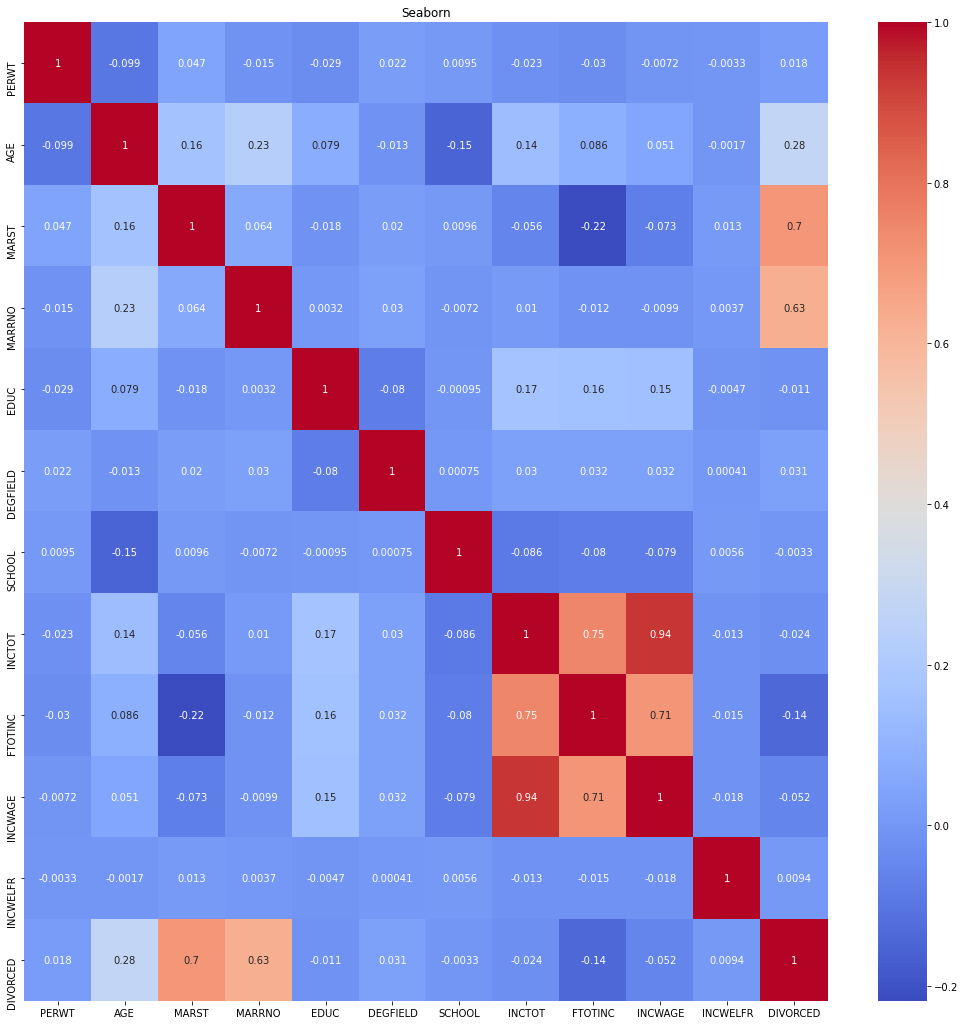

In [289]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

In [290]:
def adding_success_features(data, field_dic):
    outliers = data[data['INCTOT'] >= 200000].groupby('DEGFIELD').sum()
    total = data.groupby('DEGFIELD').sum()
    sum_outliers = outliers.PERWT.sum()
    
    precent_of_success = {}
    weighted_success = {}
    for k, v in field_dic.items():
        key = int(k)
        outliers_num = outliers.loc[key].PERWT if key in outliers.index else 0
        precent_of_success[key] = outliers_num/total.loc[key].PERWT
        weighted_success[key] = outliers_num/sum_outliers
        
    data["SUCCES_PERCENT"] = data['DEGFIELD'].map(precent_of_success)
    data["WEIGHT_SUCCES"] = data['DEGFIELD'].map(weighted_success)
    
    return data

In [291]:
df = adding_success_features(df, field_dic)

Text(0.5, 1.0, 'Seaborn')

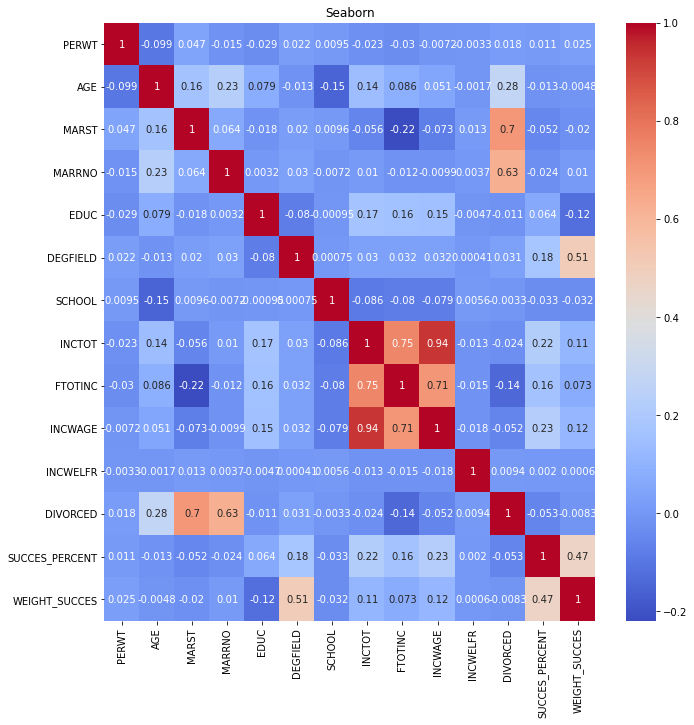

In [292]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')

# Regression

In [160]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [161]:
df = df.drop(['SCHOOL'], axis =1)

In [162]:
df['DIVORCED'].unique()

array([3, 4, 2])

In [163]:
sample_df = df.sample(frac = 0.2)

In [164]:
sample_df.shape

(851310, 13)

In [165]:
mask = (sample_df.DIVORCED == 2)

idx, = np.where(mask)

sample_df = sample_df.drop(sample_df.index[idx[:len(idx)//2]])

In [166]:
sample_df['DIVORCED'].value_counts()

2    302509
3    230438
4     15855
Name: DIVORCED, dtype: int64

In [167]:
x   = sample_df[['EDUC', 'DEGFIELD', 'INCTOT', 'INCWAGE', 'INCWELFR']]
y   = sample_df['DIVORCED']
#y = df['MARRNO']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.1)
print(X_train.shape)
print(y_test.shape)

(493921, 5)
(54881,)


In [169]:
categorical = x.dtypes == object #map continuous vs. categorical
scaled_preprocessor = make_column_transformer(
    (StandardScaler(), ~categorical),
    remainder = 'passthrough')

In [170]:
#OLS
ols_model = make_pipeline(scaled_preprocessor, LinearRegression())
scores=cross_val_score(ols_model, X_train, y_train)
print("OLS score: {}".format(np.mean(scores)))

#RIDGE
ridge_model = make_pipeline(scaled_preprocessor, Ridge(max_iter=100000))
scores=cross_val_score(ridge_model, X_train, y_train)
print("Ridge score: {}".format(np.mean(scores)))

#LASSO
lasso_model = make_pipeline(scaled_preprocessor, Lasso(max_iter=500000))
scores=cross_val_score(lasso_model, X_train, y_train)
print("Lasso score: {}".format(np.mean(scores)))

OLS score: 0.01111585227908909
Ridge score: 0.011115852826746852
Lasso score: -3.687289539344718e-06


In [171]:
#OLS
ols_model = LinearRegression()
scores=cross_val_score(ols_model, X_train, y_train)
print("OLS score: {}".format(np.mean(scores)))

#RIDGE
ridge_model = Ridge(max_iter=100000)
scores=cross_val_score(ridge_model, X_train, y_train)
print("Ridge score: {}".format(np.mean(scores)))

#LASSO
lasso_model = Lasso(max_iter=500000)
scores=cross_val_score(lasso_model, X_train, y_train)
print("Lasso score: {}".format(np.mean(scores)))

OLS score: 0.011115852279089001
Ridge score: 0.011115852320106834
Lasso score: 0.00990682492735584


# Random Forest Classifier

In [172]:
from collections import Counter
Counter(y_train)

Counter({3: 207378, 2: 272253, 4: 14290})

In [173]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
scores=cross_val_score(clf, X_train, y_train)
print("RF score: {}".format(np.mean(scores)))

RF score: 0.5513958711357245


In [174]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
scores=cross_val_score(clf, X_train, y_train)
print("RF score: {}".format(np.mean(scores)))

RF score: 0.5513958711357245


In [175]:
model = RandomForestClassifier(max_depth=4) # XGBClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [176]:
model.score(X_test,y_test)

0.5563674131302272

In [177]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)


Variable  Importance
3   INCWAGE    0.401219
1  DEGFIELD    0.333858
2    INCTOT    0.223732
4  INCWELFR    0.035413
0      EDUC    0.005778

In [178]:
estimator = model.estimators_[5]

In [179]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='rf_classifier.dot', 
                feature_names = X_train.columns,
                class_names = [str(i) for i in np.unique(y_test.values)],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'rf_classifier.dot', '-o', 'rf_classifier.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'rf_classifier.png')

# Random Forest Regressor

In [180]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [181]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [182]:
model.score(X_test,y_test)

0.5563674131302272

In [ ]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)
